# Pilot Project2
> 4기 윤다빈

## 데이터 불러오기

In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients.xls


In [39]:
df = pd.read_excel("default of credit card clients.xls", header=1)

In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### 결측치 확인

In [46]:
df.isna().sum().sum()

np.int64(0)

In [47]:
(df == "").sum().sum()       # 빈 문자열 개수
(df == "NA").sum().sum()     # "NA"라는 문자열 개수
(df == "?").sum().sum()      # "?" 개수

np.int64(0)

*결측치가 없음을 확인*

In [48]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [49]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [50]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [51]:
df.LIMIT_BAL.describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


### 이상치 확인

In [52]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 파생변수 만들기

#### 1. 이용률
> 한도 대비 청구 금액 사용 비율 <br>
> 사용액이 한도 대비 지나치게 크면 연체 위험 증가 가능

- BILL_AMT6 : 마지막달의 청구 금액
- LMIT_BAL : 개인별 신용카드 한도
- utilization : 신용카드 한도 중에서 실제로 얼마나 썼는지를 비율로 표현 (*new*)

In [55]:
df["utilization"] = df["BILL_AMT6"] / df["LIMIT_BAL"]

In [58]:
print(df["utilization"])

0        0.000000
1        0.027175
2        0.172767
3        0.590940
4        0.382620
           ...   
29995    0.072636
29996    0.000000
29997    0.645233
29998    0.611800
29999    0.306260
Name: utilization, Length: 30000, dtype: float64


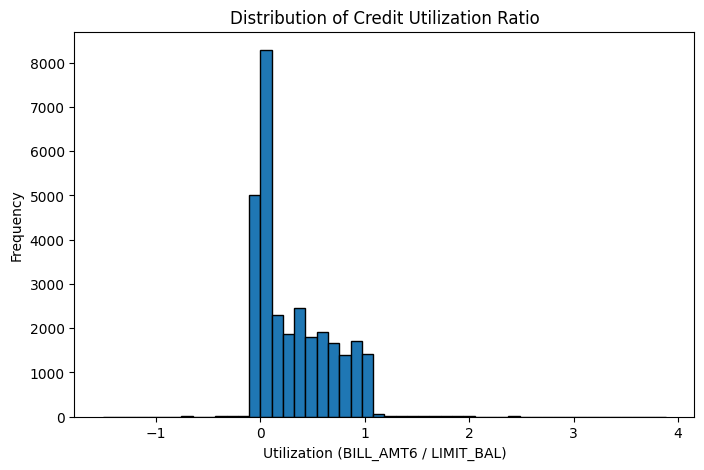

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["utilization"], bins=50, edgecolor="black")
plt.title("Distribution of Credit Utilization Ratio")
plt.xlabel("Utilization (BILL_AMT6 / LIMIT_BAL)")
plt.ylabel("Frequency")
plt.show()

- 시사점 : 1을 초과하는 경우 한도를 초과한 것
- 문제점 : 음수가 나오는 경우가 존재

#### 2. 상환율
> 청구 금액 대비 실제 상환 비율 <br>
> 청구액에 비해 상환이 부족하면 연체 위험 상승

In [66]:
df["repayment_ratio"] = df["PAY_AMT6"] / (df["BILL_AMT6"] + 1)

In [67]:
print(df["repayment_ratio"])

0        0.000000
1        0.613121
2        0.321543
3        0.033843
4        0.035490
           ...   
29995    0.062574
29996    0.000000
29997    0.160141
29998    0.036858
29999    0.065300
Name: repayment_ratio, Length: 30000, dtype: float64


*적절한 최소 상환비율을 알아보기 위해서는 조사가 필요*